In [247]:
import pandas as pd
import numpy as np

# Load files
barley_df = pd.read_csv("dataset/barley_yield_from_1982.csv", sep=";", index_col=0)
climate_df = pd.read_parquet("dataset/climate_data_from_1982.parquet")

print(barley_df.head())
print(climate_df.head())


   department  year    yield     area  production
82        Ain  1982  3.95008  16065.0     63458.0
83        Ain  1983      NaN  14500.0     38400.0
84        Ain  1984  4.82258  15500.0     74750.0
85        Ain  1985  4.19677  15500.0     65050.0
86        Ain  1986  3.59845  12900.0     46420.0
         scenario nom_dep code_dep                time  year  \
29950  historical     Ain       01 1982-01-01 12:00:00  1982   
29951  historical     Ain       01 1982-01-02 12:00:00  1982   
29952  historical     Ain       01 1982-01-03 12:00:00  1982   
29953  historical     Ain       01 1982-01-04 12:00:00  1982   
29954  historical     Ain       01 1982-01-05 12:00:00  1982   

                             metric       value  
29950  near_surface_air_temperature  276.292267  
29951  near_surface_air_temperature  275.092407  
29952  near_surface_air_temperature  276.418518  
29953  near_surface_air_temperature  278.893372  
29954  near_surface_air_temperature  278.887207  


In [248]:
barley_df.describe()

,year,yield,area,production
count,3583.000000,3336.000000,3468.000000,3461.000000
mean,1999.971532,5.212239,18767.079585,110239.297180
std,10.664744,1.369354,20266.789390,133060.332166
min,1982.000000,0.813560,0.000000,0.000000
25%,1991.000000,4.242530,3766.500000,17240.000000
50%,2000.000000,5.261230,11810.500000,56744.900000
75%,2009.000000,6.225615,27495.500000,153285.200000
max,2018.000000,8.400000,119310.000000,919249.600000


In [249]:
barley_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3583 entries, 82 to 11536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   department  3583 non-null   object 
 1   year        3583 non-null   int64  
 2   yield       3336 non-null   float64
 3   area        3468 non-null   float64
 4   production  3461 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 168.0+ KB


In [250]:
barley_df.isna().sum()

department      0
year            0
yield         247
area          115
production    122
dtype: int64

In [251]:
barley_df["computed_production"] = barley_df["yield"] * barley_df["area"]

barley_df[["production", "computed_production"]].corr()


,production,computed_production
production,1.000000,0.999999
computed_production,0.999999,1.000000


In [252]:
barley_df[["yield", "area", "production"]].isna().sum(axis=1).value_counts()


0    3333
1     131
3     115
2       4
Name: count, dtype: int64

In [253]:
check = barley_df.dropna(subset=["yield", "area", "production"])

(
    (check["production"] / check["area"]) - check["yield"]
).abs().describe()

count    3.333000e+03
mean     1.170071e-03
std      6.127822e-03
min      0.000000e+00
25%      1.875167e-07
50%      1.981424e-06
75%      3.562003e-06
max      5.000000e-02
dtype: float64

In [254]:
barley_df.groupby("department")["yield"].agg(["mean", "std", "min", "max"])


,mean,std,min,max
department,,,,
Ain,5.469579,0.891030,3.59845,6.90000
Aisne,6.989706,0.605184,5.60000,8.40000
Allier,4.852052,0.825012,2.70789,5.95007
Alpes_Maritimes,3.254286,0.983122,0.81356,4.53704
Alpes_de_Haute_Provence,3.697194,0.488268,2.59536,4.46364
...,...,...,...,...
Vendee,5.368915,0.911777,2.82045,6.92233
Vienne,5.386209,0.832716,2.99556,6.89528
Vosges,5.396514,0.878957,2.62376,6.67500


In [255]:
climate_df.groupby("metric")["value"].describe()


,count,mean,std,min,25%,50%,75%,max
metric,,,,,,,,
daily_maximum_near_surface_air_temperature,4478308.0,288.603363,8.324001,2.532118e+02,2.824767e+02,287.805389,294.618103,319.311035
near_surface_air_temperature,4583500.0,283.964661,7.419903,2.455779e+02,2.786087e+02,283.396454,289.544655,307.876160
precipitation,4478308.0,0.000085,0.000172,-2.681981e-23,3.613616e-07,0.000013,0.000092,0.005103


In [256]:
climate_df[climate_df["metric"] == "near_surface_air_temperature"]["value"].describe()

count    4.583500e+06
mean     2.839647e+02
std      7.419903e+00
min      2.455779e+02
25%      2.786087e+02
50%      2.833965e+02
75%      2.895447e+02
max      3.078762e+02
Name: value, dtype: float64

In [257]:
barley_df

,department,year,yield,area,production,computed_production
82,Ain,1982,3.95008,16065.0,63458.00,63458.0352
83,Ain,1983,NaN,14500.0,38400.00,NaN
84,Ain,1984,4.82258,15500.0,74750.00,74749.9900
85,Ain,1985,4.19677,15500.0,65050.00,65049.9350
86,Ain,1986,3.59845,12900.0,46420.00,46420.0050
...,...,...,...,...,...,...
11532,Yvelines,2014,7.70000,10180.0,78546.00,78386.0000
11533,Yvelines,2015,8.00000,11420.0,91400.50,91360.0000
11534,Yvelines,2016,NaN,12225.0,64792.50,NaN
11535,Yvelines,2017,7.31000,13735.0,100402.85,100402.8500


In [258]:
climate_df["time"] = pd.to_datetime(climate_df["time"])

In [259]:
climate_df["year"] = climate_df["time"].dt.year
climate_df.groupby("year")["value"].mean()

year
1982    190.332870
1983    189.562759
1984    189.770966
1985    189.639648
1986    190.006485
           ...    
2046    192.332672
2047    192.075363
2048    192.489761
2049    192.807068
2050    192.254700
Name: value, Length: 69, dtype: float32

In [260]:
climate_df["scenario"].unique()

array(['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5'], dtype=object)

### EDA Barley

In [261]:
mask = (
    barley_df["yield"].isna() &
    barley_df["area"].notna() &
    barley_df["production"].notna()
)

barley_df.loc[mask, "yield"] = (
    barley_df.loc[mask, "production"] /
    barley_df.loc[mask, "area"]
)
barley_df["yield"].isna().sum()

np.int64(122)

In [262]:
barley_df["department"].unique()

array(['Ain', 'Aisne', 'Allier', 'Alpes_de_Haute_Provence',
       'Alpes_Maritimes', 'Ardeche', 'Ardennes', 'Ariege', 'Aube', 'Aude',
       'Aveyron', 'Bas_Rhin', 'Bouches_du_Rhone', 'Calvados', 'Cantal',
       'Charente', 'Charente_Maritime', 'Cher', 'Correze', 'Corse_du_Sud',
       'Cote_d_Or', 'Cotes_d_Armor', 'Creuse', 'Deux_Sevres', 'Dordogne',
       'Doubs', 'Drome', 'Essonne', 'Eure', 'Eure_et_Loir', 'Finistere',
       'Gard', 'Gers', 'Gironde', 'Haut_Rhin', 'Haute_Corse',
       'Haute_Garonne', 'Haute_Loire', 'Haute_Marne', 'Haute_Saone',
       'Haute_Savoie', 'Haute_Vienne', 'Hautes_Alpes', 'Hautes_pyrenees',
       'Hauts_de_Seine', 'Herault', 'Ille_et_Vilaine', 'Indre',
       'Indre_et_Loire', 'Isere', 'Jura', 'Landes', 'Loir_et_Cher',
       'Loire', 'Loire_Atlantique', 'Loiret', 'Lot', 'Lot_et_Garonne',
       'Lozere', 'Maine_et_Loire', 'Manche', 'Marne', 'Mayenne',
       'Meurthe_et_Moselle', 'Meuse', 'Morbihan', 'Moselle', 'Nievre',
       'Nord', 'Oise', 'Orn

In [263]:
barley_clean = barley_df.copy()
barley_clean = barley_clean.dropna(
    subset=["yield", "area", "production"],
    how="all"
)

In [264]:
barley_clean = barley_clean.dropna(subset=["yield"])
barley_clean["yield"].isna().sum()

np.int64(0)

In [265]:
print("Original shape:", barley_df.shape)
print("Clean shape:", barley_clean.shape)


Original shape: (3583, 6)
Clean shape: (3461, 6)


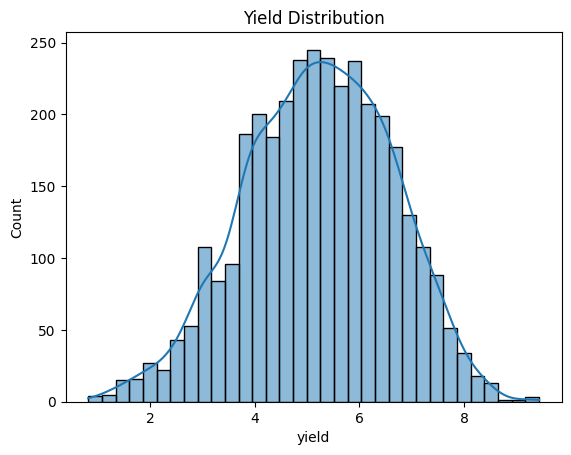

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt
#yield distribution
sns.histplot(barley_clean["yield"], kde=True)
plt.title("Yield Distribution")
plt.show()

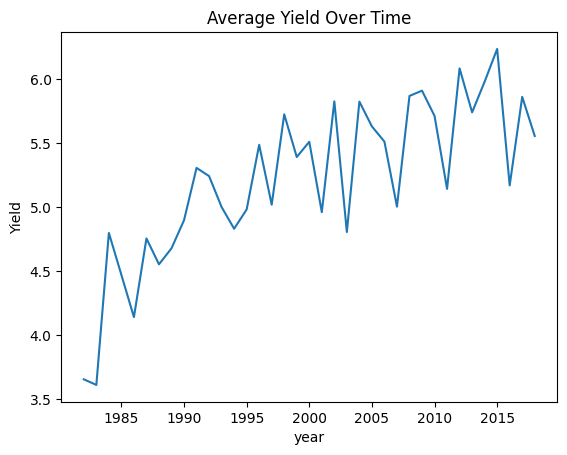

In [267]:
barley_clean.groupby("year")["yield"].mean().plot()
plt.title("Average Yield Over Time")
plt.ylabel("Yield")
plt.show()

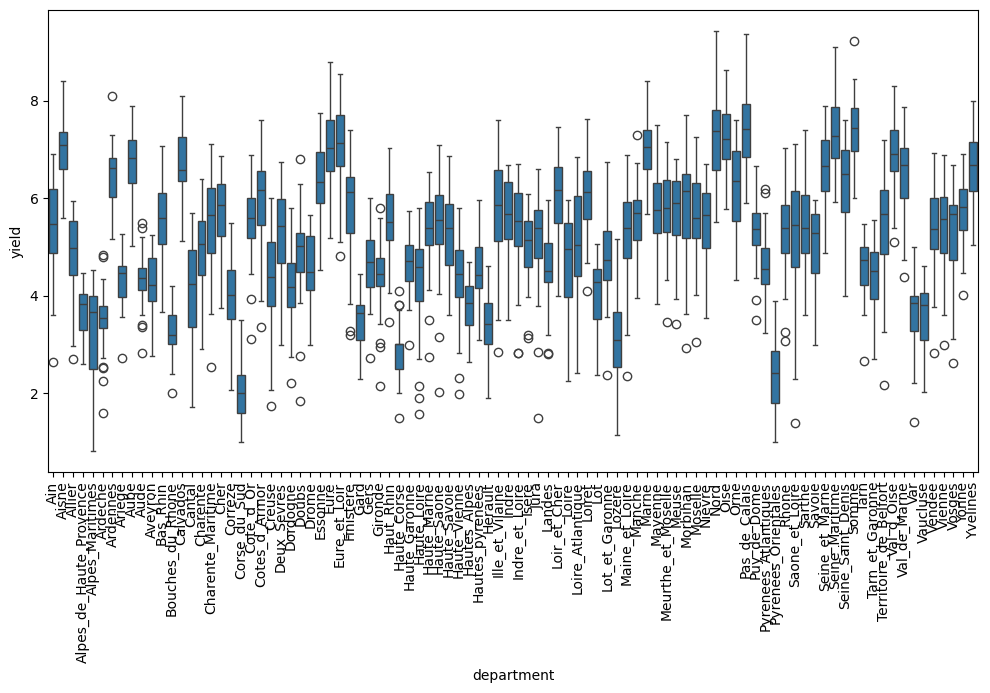

In [268]:
plt.figure(figsize=(12,6))
sns.boxplot(data=barley_clean, x="department", y="yield")
plt.xticks(rotation=90)
plt.show()


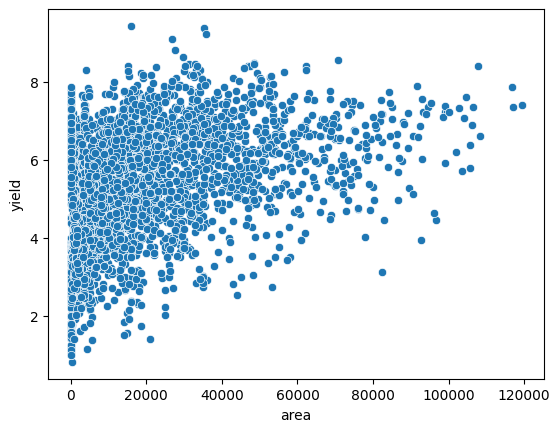

In [269]:
sns.scatterplot(data=barley_clean, x="area", y="yield")
plt.show()

In [270]:
barley_clean.groupby("year")["yield"].mean().head()
barley_clean.groupby("year")["yield"].mean().tail()


year
2014    5.980350
2015    6.236235
2016    5.170532
2017    5.861809
2018    5.556559
Name: yield, dtype: float64

### Climate EDA

In [271]:
climate_df["metric"].unique()


array(['near_surface_air_temperature',
       'daily_maximum_near_surface_air_temperature', 'precipitation'],
      dtype=object)

In [272]:
climate_hist = climate_df[climate_df["scenario"] == "historical"]
climate_future = climate_df[climate_df["scenario"] != "historical"]

In [273]:
climate_yearly = (
    climate_df
    .groupby(["scenario", "nom_dep", "year", "metric"])["value"]
    .mean()
    .reset_index()
)


In [274]:
climate_pivot = climate_yearly.pivot(
    index=["scenario", "nom_dep", "year"],
    columns="metric",
    values="value"
).reset_index()

In [275]:
climate_pivot = climate_pivot.rename(columns={"nom_dep": "department"})

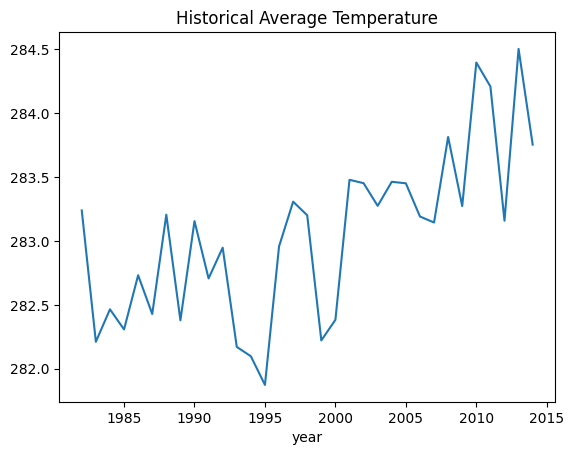

In [276]:
hist_temp = climate_pivot[
    climate_pivot["scenario"] == "historical"
]

hist_temp.groupby("year")["near_surface_air_temperature"].mean().plot()
plt.title("Historical Average Temperature")
plt.show()


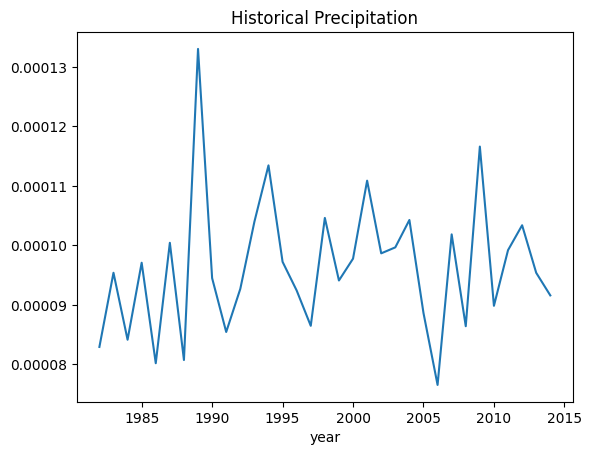

In [277]:
hist_temp.groupby("year")["precipitation"].mean().plot()
plt.title("Historical Precipitation")
plt.show()


In [278]:
avg_temp = climate_pivot.groupby(
    ["scenario", "year"]
)["near_surface_air_temperature"].mean().reset_index()


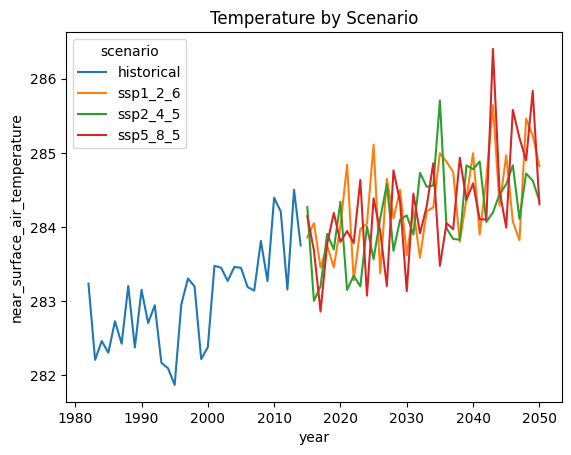

In [279]:
import seaborn as sns

sns.lineplot(
    data=avg_temp,
    x="year",
    y="near_surface_air_temperature",
    hue="scenario"
)
plt.title("Temperature by Scenario")
plt.show()


### Modeling

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [281]:
barley = barley_df.copy()

# Reconstruct yield when possible
mask = barley["yield"].isna() & barley["area"].notna() & barley["production"].notna() & (barley["area"] > 0)
barley.loc[mask, "yield"] = barley.loc[mask, "production"] / barley.loc[mask, "area"]

# Drop rows where all 3 agri vars are missing
barley = barley.dropna(subset=["yield", "area", "production"], how="all").copy()

# Target must exist
barley = barley.dropna(subset=["yield"]).copy()

# Enforce numeric types
for c in ["yield", "area", "production"]:
    barley[c] = pd.to_numeric(barley[c], errors="coerce")

barley["year"] = pd.to_numeric(barley["year"], errors="coerce").astype("Int64")

print(barley.shape)
barley[["yield","area","production"]].isna().sum()

(3461, 6)


yield         0
area          0
production    3
dtype: int64

In [282]:
climate = climate_df.copy()

climate["time"] = pd.to_datetime(climate["time"], errors="coerce")
climate["year"] = climate["time"].dt.year.astype("Int64")
climate["value"] = pd.to_numeric(climate["value"], errors="coerce")

print(climate.shape)
climate[["scenario","nom_dep","code_dep","time","year","metric","value"]].isna().sum()

(13540116, 7)


scenario    0
nom_dep     0
code_dep    0
time        0
year        0
metric      0
value       0
dtype: int64

In [283]:
w = (
    climate
    .pivot_table(
        index=["scenario","code_dep","nom_dep","time","year"],
        columns="metric",
        values="value",
        aggfunc="mean"
    )
    .reset_index()
)

w.columns.name = None
w.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation
0,historical,01,Ain,1982-01-01 12:00:00,1982,279.337311,276.292267,0.000033
1,historical,01,Ain,1982-01-02 12:00:00,1982,277.687225,275.092407,0.000139
2,historical,01,Ain,1982-01-03 12:00:00,1982,278.388794,276.418518,0.000091
3,historical,01,Ain,1982-01-04 12:00:00,1982,283.519043,278.893372,0.000057
4,historical,01,Ain,1982-01-05 12:00:00,1982,281.122253,278.887207,0.000257


In [284]:
# Kelvin -> Celsius
temp_cols = ["near_surface_air_temperature", "daily_maximum_near_surface_air_temperature"]
for col in temp_cols:
    if col in w.columns:
        w[col] = w[col] - 273.15

# precip (mm/s) -> mm/day
if "precipitation" in w.columns:
    w["precipitation_mm_day"] = w["precipitation"] * 86400.0

w[["near_surface_air_temperature","daily_maximum_near_surface_air_temperature","precipitation_mm_day"]].describe()

,near_surface_air_temperature,daily_maximum_near_surface_air_temperature,precipitation_mm_day
count,4.583500e+06,4.478308e+06,4.478308e+06
mean,1.081467e+01,1.545337e+01,7.338108e+00
std,7.419903e+00,8.324001e+00,1.481961e+01
min,-2.757205e+01,-1.993820e+01,-2.317232e-18
25%,5.458740e+00,9.326752e+00,3.122164e-02
50%,1.024646e+01,1.465540e+01,1.155305e+00
75%,1.639466e+01,2.146811e+01,7.960360e+00
max,3.472617e+01,4.616104e+01,4.409006e+02


In [285]:
GROW_START, GROW_END = 3, 6   # Mar..Jul
TBASE = 5.0
HEAT_TH = 30.0
DRY_TH = 1.0  # mm/day

w["month"] = w["time"].dt.month
gs = w[(w["month"] >= GROW_START) & (w["month"] <= GROW_END)].copy()

# Hot day indicator
gs["hot_day"] = (gs["daily_maximum_near_surface_air_temperature"] > HEAT_TH).astype(int)

# Dry day indicator
gs["dry_day"] = (gs["precipitation_mm_day"] < DRY_TH).astype(int)

# Growing degree days per day
gs["gdd_day"] = np.maximum(gs["near_surface_air_temperature"] - TBASE, 0.0)

gs.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation,precipitation_mm_day,month,hot_day,dry_day,gdd_day
59,historical,01,Ain,1982-03-01 12:00:00,1982,4.657684,2.936859,0.000502,43.401073,3,0,0,0.0
60,historical,01,Ain,1982-03-02 12:00:00,1982,-0.897095,-2.615814,0.000091,7.823861,3,0,0,0.0
61,historical,01,Ain,1982-03-03 12:00:00,1982,1.588470,-1.741486,0.000003,0.288050,3,0,1,0.0
62,historical,01,Ain,1982-03-04 12:00:00,1982,7.511322,4.051758,0.000091,7.899230,3,0,0,0.0
63,historical,01,Ain,1982-03-05 12:00:00,1982,8.094208,4.353790,0.000091,7.891322,3,0,0,0.0


In [286]:
def max_consecutive_ones(x: pd.Series) -> int:
    run = 0
    best = 0
    for v in x.values:
        if v == 1:
            run += 1
            best = max(best, run)
        else:
            run = 0
    return best

In [287]:
feat = (
    gs.groupby(["scenario","code_dep","nom_dep","year"], as_index=False)
      .agg(
          tmean_gs=("near_surface_air_temperature","mean"),
          tmax_gs=("daily_maximum_near_surface_air_temperature","mean"),
          prcp_gs=("precipitation_mm_day","sum"),
          hot_days=("hot_day","sum"),
          gdd=("gdd_day","sum"),
          max_consec_dry=("dry_day", max_consecutive_ones),
          n_days=("dry_day","size")
      )
)

feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,historical,01,Ain,1982,10.059295,14.626305,1009.092651,0,662.802246,8,122
1,historical,01,Ain,1983,9.972292,14.668579,862.260620,0,667.758301,8,122
2,historical,01,Ain,1984,10.413260,15.474359,941.534424,0,683.433472,7,122
3,historical,01,Ain,1985,9.678772,14.589598,854.681213,0,604.843262,13,122
4,historical,01,Ain,1986,10.423288,15.344842,689.991760,0,688.687500,17,122


In [288]:
import unicodedata, re

def norm_dep(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.lower().replace("'", "")
    s = re.sub(r"[\s\-]+", "_", s)
    s = re.sub(r"[^a-z0-9_]", "", s)
    return s

barley = barley.copy()
feat = feat.copy()

barley["dep_norm"] = barley["department"].map(norm_dep)
feat["dep_norm"] = feat["nom_dep"].map(norm_dep)

barley[["department","dep_norm"]].drop_duplicates().head(10)

,department,dep_norm
82,Ain,ain
201,Aisne,aisne
320,Allier,allier
439,Alpes_de_Haute_Provence,alpes_de_haute_provence
558,Alpes_Maritimes,alpes_maritimes
677,Ardeche,ardeche
796,Ardennes,ardennes
915,Ariege,ariege
1034,Aube,aube
1153,Aude,aude


In [289]:
feat_hist = feat[feat["scenario"] == "historical"].copy()

train_df = barley.merge(
    feat_hist,
    on=["dep_norm","year"],
    how="inner"
)

print(train_df.shape)
train_df.head()

(2935, 17)


,department,year,yield,area,production,computed_production,dep_norm,scenario,code_dep,nom_dep,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,Ain,1982,3.950080,16065.0,63458.0,63458.0352,ain,historical,01,Ain,10.059295,14.626305,1009.092651,0,662.802246,8,122
1,Ain,1983,2.648276,14500.0,38400.0,NaN,ain,historical,01,Ain,9.972292,14.668579,862.260620,0,667.758301,8,122
2,Ain,1984,4.822580,15500.0,74750.0,74749.9900,ain,historical,01,Ain,10.413260,15.474359,941.534424,0,683.433472,7,122
3,Ain,1985,4.196770,15500.0,65050.0,65049.9350,ain,historical,01,Ain,9.678772,14.589598,854.681213,0,604.843262,13,122
4,Ain,1986,3.598450,12900.0,46420.0,46420.0050,ain,historical,01,Ain,10.423288,15.344842,689.991760,0,688.687500,17,122


In [290]:
feature_cols_base = ["tmean_gs","tmax_gs","prcp_gs","hot_days","gdd","max_consec_dry"]
target_col = "yield"

df = train_df.dropna(subset=feature_cols_base + [target_col]).copy()

test_start_year = 2011
tr = df[df["year"] < test_start_year].copy()
te = df[df["year"] >= test_start_year].copy()

print("Train:", tr.shape, " | Test:", te.shape)
print("Train years:", int(tr["year"].min()), "-", int(tr["year"].max()))
print("Test years :", int(te["year"].min()), "-", int(te["year"].max()))

Train: (2581, 17)  | Test: (354, 17)
Train years: 1982 - 2010
Test years : 2011 - 2014


<Axes: >

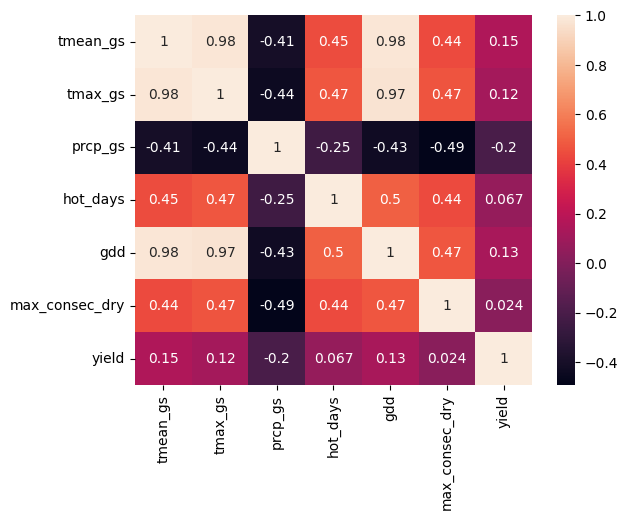

In [291]:
import seaborn as sns
sns.heatmap(train_df[feature_cols_base + ["yield"]].corr(), annot=True)


In [292]:
dep_mean = tr.groupby("dep_norm")[target_col].mean()

pred_baseline = te["dep_norm"].map(dep_mean)
mae_baseline = mean_absolute_error(te[target_col], pred_baseline)

print("Baseline MAE (dep mean):", mae_baseline)

Baseline MAE (dep mean): 0.7904304046044516


In [293]:
from xgboost import XGBRegressor

X_tr = tr[feature_cols_base]
y_tr = tr[target_col]
X_te = te[feature_cols_base]
y_te = te[target_col]

xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_te)

mae = mean_absolute_error(y_te, pred)
rmse = mean_squared_error(y_te, pred) ** 0.5
r2 = r2_score(y_te, pred)

print("XGB MAE :", mae)
print("XGB RMSE:", rmse)
print("XGB R2  :", r2)

XGB MAE : 1.0443328846489228
XGB RMSE: 1.2858975529410543
XGB R2  : -0.02805871601360388


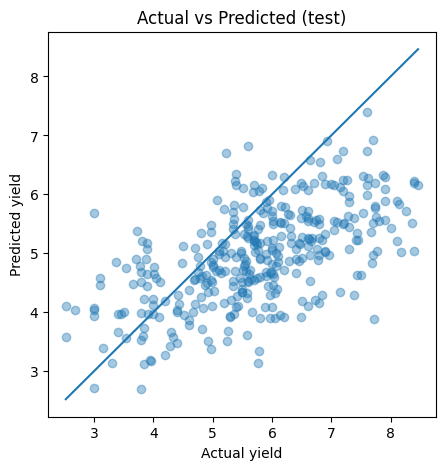

In [294]:
plt.figure(figsize=(5,5))
plt.scatter(y_te, pred, alpha=0.4)
plt.xlabel("Actual yield")
plt.ylabel("Predicted yield")
plt.title("Actual vs Predicted (test)")
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()])
plt.show()

In [295]:
feature_cols_plus = feature_cols_base + ["year"]

tr_plus = tr[feature_cols_plus + ["dep_norm", target_col]].copy()
te_plus = te[feature_cols_plus + ["dep_norm", target_col]].copy()

X_tr2 = pd.get_dummies(tr_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)
X_te2 = pd.get_dummies(te_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)

# Align columns
X_te2 = X_te2.reindex(columns=X_tr2.columns, fill_value=0)

y_tr2 = tr_plus[target_col]
y_te2 = te_plus[target_col]

xgb2 = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb2.fit(X_tr2, y_tr2)
pred2 = xgb2.predict(X_te2)

print("XGB+year+dep MAE :", mean_absolute_error(y_te2, pred2))
print("XGB+year+dep RMSE:", mean_squared_error(y_te2, pred2) ** 0.5)
print("XGB+year+dep R2  :", r2_score(y_te2, pred2))

XGB+year+dep MAE : 0.5215858548858061
XGB+year+dep RMSE: 0.6540809529963258
XGB+year+dep R2  : 0.7340082389409701


In [296]:
scenarios = ["ssp1_2_6","ssp2_4_5","ssp5_8_5"]
future_feat = feat[feat["scenario"].isin(scenarios)].dropna(subset=feature_cols_base).copy()

# include year + dep_norm encoding
future_feat["year"] = future_feat["year"].astype("Int64")
X_future = pd.get_dummies(
    future_feat[feature_cols_plus + ["dep_norm"]],
    columns=["dep_norm"],
    drop_first=True
)

X_future = X_future.reindex(columns=X_tr2.columns, fill_value=0)
future_feat["pred_yield"] = xgb2.predict(X_future)

future_feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days,dep_norm,pred_yield
2937,ssp1_2_6,01,Ain,2015,11.353307,16.617376,715.508362,0,804.861816,17,122,ain,6.119733
2938,ssp1_2_6,01,Ain,2016,11.462079,16.416426,786.753906,0,795.051941,11,122,ain,6.087844
2939,ssp1_2_6,01,Ain,2017,11.386617,16.438131,785.964661,0,789.358276,5,122,ain,6.189097
2940,ssp1_2_6,01,Ain,2018,11.322295,16.279688,1065.534302,0,776.292114,7,122,ain,6.091519
2941,ssp1_2_6,01,Ain,2019,10.146747,15.146076,833.640991,0,681.470093,13,122,ain,5.807217


In [297]:
baseline_years = (2004, 2014)

baseline = (
    barley[(barley["year"]>=baseline_years[0]) & (barley["year"]<=baseline_years[1])]
    .groupby("dep_norm", as_index=False)["yield"].mean()
    .rename(columns={"yield":"baseline_yield"})
)

proj = future_feat.merge(baseline, on="dep_norm", how="left")
proj["yield_change_pct"] = (proj["pred_yield"] - proj["baseline_yield"]) / proj["baseline_yield"] * 100

proj[["scenario","nom_dep","year","pred_yield","baseline_yield","yield_change_pct"]].head(10)

,scenario,nom_dep,year,pred_yield,baseline_yield,yield_change_pct
0,ssp1_2_6,Ain,2015,6.119733,6.115729,0.065467
1,ssp1_2_6,Ain,2016,6.087844,6.115729,-0.455951
2,ssp1_2_6,Ain,2017,6.189097,6.115729,1.199666
3,ssp1_2_6,Ain,2018,6.091519,6.115729,-0.395860
4,ssp1_2_6,Ain,2019,5.807217,6.115729,-5.044566
5,ssp1_2_6,Ain,2020,5.928202,6.115729,-3.066313
6,ssp1_2_6,Ain,2021,5.871377,6.115729,-3.995470
7,ssp1_2_6,Ain,2022,6.039888,6.115729,-1.240093
8,ssp1_2_6,Ain,2023,5.976587,6.115729,-2.275154
9,ssp1_2_6,Ain,2024,5.839177,6.115729,-4.521986


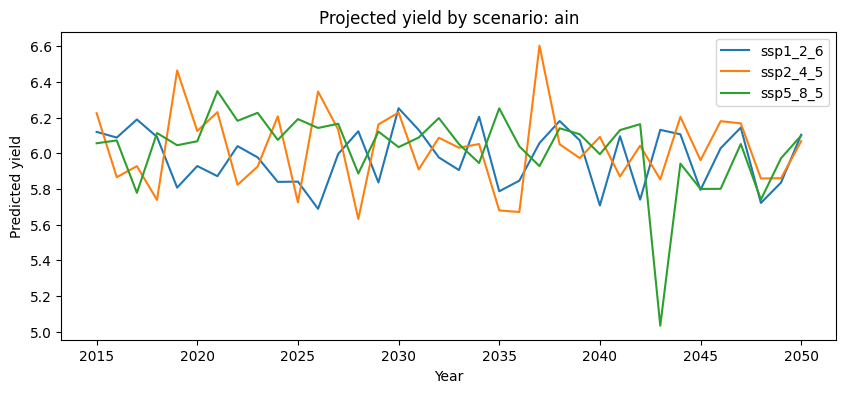

In [298]:
import matplotlib.pyplot as plt
dep_show = "ain"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

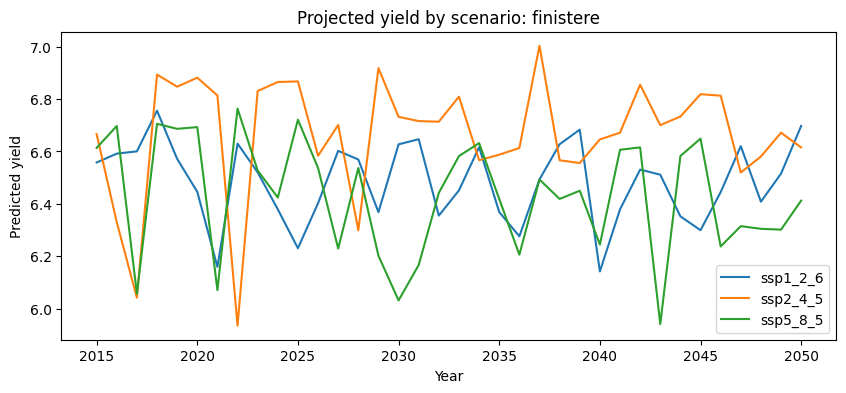

In [299]:
dep_show = "finistere"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

In [300]:
proj.groupby(["scenario"])["pred_yield"].mean()

scenario
ssp1_2_6    5.820069
ssp2_4_5    5.878029
ssp5_8_5    5.835599
Name: pred_yield, dtype: float32

In [301]:
proj.groupby("scenario")["pred_yield"].std()

scenario
ssp1_2_6    1.066446
ssp2_4_5    1.064716
ssp5_8_5    1.081110
Name: pred_yield, dtype: float32

<Axes: xlabel='year'>

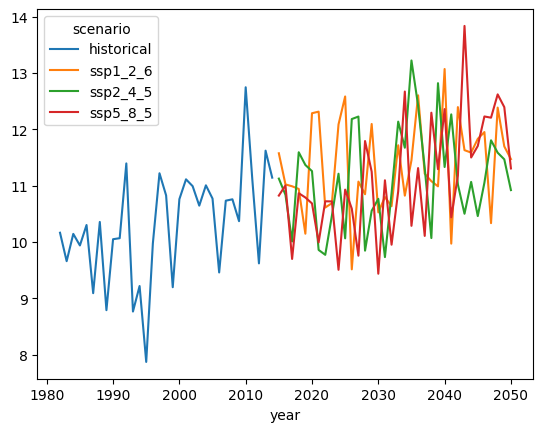

In [302]:
feat.groupby(["scenario","year"])["tmean_gs"].mean().unstack("scenario").plot()

### Plot the Map

In [303]:
import requests, json
import geopandas as gpd

url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
r = requests.get(url, verify=False, timeout=60)
r.raise_for_status()

geojson_path = "departements.geojson"
with open(geojson_path, "wb") as f:
    f.write(r.content)

gdf = gpd.read_file(geojson_path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Departments with data: 81
count    81.000000
mean      4.869173
std       7.911699
min      -8.635295
25%      -0.254310
50%       3.250636
75%       8.026746
max      31.034652
Name: yield_change_pct, dtype: float64


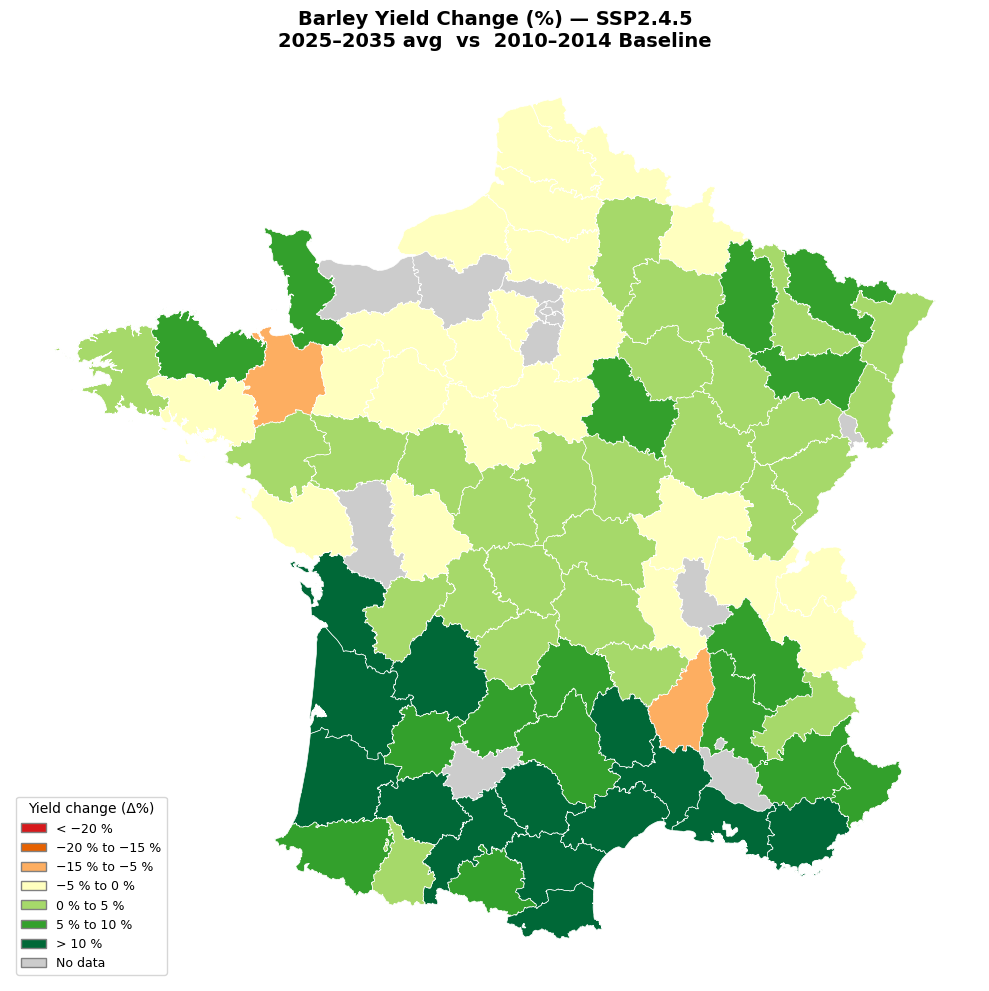

In [304]:
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# ── 1. Filter SSP2-4.5, years 2025-2035 and compute average Δ yield per dept ──
ssp = "ssp2_4_5"
year_lo, year_hi = 2025, 2035

proj_ssp2 = proj[
    (proj["scenario"] == ssp) &
    (proj["year"] >= year_lo) &
    (proj["year"] <= year_hi)
].copy()

delta = (
    proj_ssp2
    .groupby(["code_dep", "nom_dep"], as_index=False)["yield_change_pct"]
    .mean()
)

# Sanity check
print(f"Departments with data: {delta.shape[0]}")
print(delta["yield_change_pct"].describe())


# Mainland France only (code < "97")
gdf["code2"] = pd.to_numeric(gdf["code"].str[:2], errors="coerce")
gdf = gdf[gdf["code2"] < 97].copy()

# ── 3. Merge yield data → geometry ──────────────────────────────────────────
delta["code_dep"] = delta["code_dep"].astype(str).str.zfill(2)
gdf = gdf.merge(delta, left_on="code", right_on="code_dep", how="left")

# ── 4. Categorise into color bins (green split into 3 tiers) ───────────────
bins   = [-np.inf, -20, -15, -5, 0, 5, 10, np.inf]
labels = [
    "< −20 %",
    "−20 % to −15 %",
    "−15 % to −5 %",
    "−5 % to 0 %",
    "0 % to 5 %",
    "5 % to 10 %",
    "> 10 %",
]
colors = [
    "#d7191c",   # red          < -20%
    "#e66101",   # dark orange  -20% to -15%
    "#fdae61",   # orange       -15% to -5%
    "#ffffbf",   # yellow       -5% to 0%
    "#a6d96a",   # light green   0% to 5%
    "#33a02c",   # medium green  5% to 10%
    "#006837",   # dark green    > 10%
]

gdf["bin"] = pd.cut(gdf["yield_change_pct"], bins=bins, labels=labels)

cmap  = ListedColormap(colors)
norm  = BoundaryNorm(bins, cmap.N)

# ── 5. Plot choropleth ──────────────────────────────────────────────────────
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Departments with no data → grey background
gdf[gdf["yield_change_pct"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

# Departments with data
gdf.dropna(subset=["yield_change_pct"]).plot(
    ax=ax,
    column="yield_change_pct",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

# Legend
legend_patches = [Patch(facecolor=c, edgecolor="grey", label=l)
                  for c, l in zip(colors, labels)]
legend_patches.append(Patch(facecolor="#cccccc", edgecolor="grey", label="No data"))
ax.legend(handles=legend_patches, loc="lower left", fontsize=9,
          title="Yield change (Δ%)", title_fontsize=10, frameon=True)

ax.set_title(
    f"Barley Yield Change (%) — {ssp.upper().replace('_','.')}\n"
    f"{year_lo}–{year_hi} avg  vs  2010–2014 Baseline",
    fontsize=14, fontweight="bold"
)
ax.set_axis_off()

plt.tight_layout()
plt.show()

[SSP5-8.5] Departments with data: 89
count    89.000000
mean      2.373935
std       7.041301
min      -5.796799
25%      -1.754648
50%       0.366856
75%       3.717808
max      41.421827
Name: yield_change_pct, dtype: float64


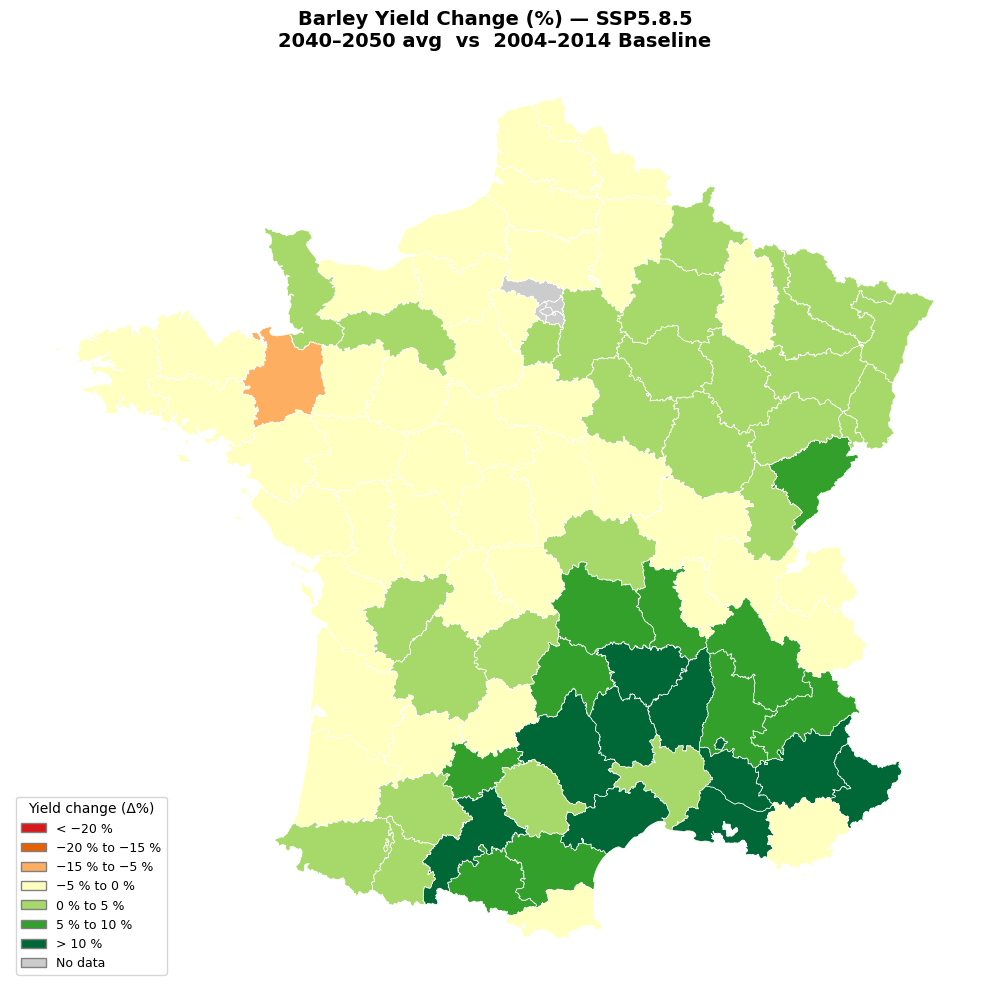

In [314]:
# ── SSP5-8.5 Choropleth ──────────────────────────────────────────────────────
#ssp5 = "ssp1_2_6"
ssp5 = "ssp5_8_5"
year_lo, year_hi = 2040, 2050

proj_ssp5 = proj[
    (proj["scenario"] == ssp5) &
    (proj["year"] >= year_lo) &
    (proj["year"] <= year_hi)
].copy()

delta5 = (
    proj_ssp5
    .groupby(["code_dep", "nom_dep"], as_index=False)["yield_change_pct"]
    .mean()
)

print(f"[SSP5-8.5] Departments with data: {delta5.shape[0]}")
print(delta5["yield_change_pct"].describe())

# Reload GeoJSON (fresh copy, since the previous cell modified gdf)
gdf5 = gpd.read_file("departements.geojson")
gdf5["code2"] = pd.to_numeric(gdf5["code"].str[:2], errors="coerce")
gdf5 = gdf5[gdf5["code2"] < 97].copy()

delta5["code_dep"] = delta5["code_dep"].astype(str).str.zfill(2)
gdf5 = gdf5.merge(delta5, left_on="code", right_on="code_dep", how="left")

# Same color bins
bins   = [-np.inf, -20, -15, -5, 0, 5, 10, np.inf]
labels = [
    "< −20 %",
    "−20 % to −15 %",
    "−15 % to −5 %",
    "−5 % to 0 %",
    "0 % to 5 %",
    "5 % to 10 %",
    "> 10 %",
]
colors = [
    "#d7191c",   # red          < -20%
    "#e66101",   # dark orange  -20% to -15%
    "#fdae61",   # orange       -15% to -5%
    "#ffffbf",   # yellow       -5% to 0%
    "#a6d96a",   # light green   0% to 5%
    "#33a02c",   # medium green  5% to 10%
    "#006837",   # dark green    > 10%
]

gdf5["bin"] = pd.cut(gdf5["yield_change_pct"], bins=bins, labels=labels)

cmap  = ListedColormap(colors)
norm  = BoundaryNorm(bins, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

gdf5[gdf5["yield_change_pct"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

gdf5.dropna(subset=["yield_change_pct"]).plot(
    ax=ax,
    column="yield_change_pct",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

legend_patches = [Patch(facecolor=c, edgecolor="grey", label=l)
                  for c, l in zip(colors, labels)]
legend_patches.append(Patch(facecolor="#cccccc", edgecolor="grey", label="No data"))
ax.legend(handles=legend_patches, loc="lower left", fontsize=9,
          title="Yield change (Δ%)", title_fontsize=10, frameon=True)

ax.set_title(
    f"Barley Yield Change (%) — {ssp5.upper().replace('_','.')}\n"
    f"{year_lo}–{year_hi} avg  vs  2004–2014 Baseline",
    fontsize=14, fontweight="bold"
)
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
# proj_ssp2[proj_ssp2["code_dep"].astype(str).str.zfill(2)=="14"][
#     ["year","pred_yield","baseline_yield","yield_change_pct"]
# ].head(20)

,year,pred_yield,baseline_yield,yield_change_pct


In [ ]:
# proj["code_dep"] = proj["code_dep"].astype(str).str.zfill(2)

# print("proj has dep14 rows:", (proj["code_dep"]=="14").sum())
# print("proj scenarios for dep14:", proj.loc[proj["code_dep"]=="14", "scenario"].unique())
# print("proj year range for dep14:",
#       proj.loc[proj["code_dep"]=="14", "year"].min(),
#       proj.loc[proj["code_dep"]=="14", "year"].max())

proj has dep14 rows: 72
proj scenarios for dep14: ['ssp1_2_6' 'ssp5_8_5']
proj year range for dep14: 2015 2050


In [ ]:
# feat["code_dep"] = feat["code_dep"].astype(str).str.zfill(2)

# tmp = feat[(feat["code_dep"]=="14") & (feat["scenario"]=="ssp2_4_5")]
# print("feat dep14 ssp2 rows:", len(tmp))
# if len(tmp) > 0:
#     print("year range:", tmp["year"].min(), tmp["year"].max())
#     print(tmp.isna().mean().sort_values(ascending=False).head(20))

feat dep14 ssp2 rows: 36
year range: 2015 2050
tmax_gs           1.0
scenario          0.0
code_dep          0.0
nom_dep           0.0
year              0.0
tmean_gs          0.0
prcp_gs           0.0
hot_days          0.0
gdd               0.0
max_consec_dry    0.0
n_days            0.0
dep_norm          0.0
dtype: float64


In [ ]:
# deps_ssp1 = set(proj.loc[proj["scenario"]=="ssp1_2_6","code_dep"].astype(str).str.zfill(2))
# deps_ssp2 = set(proj.loc[proj["scenario"]=="ssp2_4_5","code_dep"].astype(str).str.zfill(2))
# deps_ssp5 = set(proj.loc[proj["scenario"]=="ssp5_8_5","code_dep"].astype(str).str.zfill(2))

# missing_in_ssp2 = sorted((deps_ssp1 | deps_ssp5) - deps_ssp2)
# print("Deps missing in SSP2 (but exist in SSP1/SSP5):", missing_in_ssp2[:30], " ... total:", len(missing_in_ssp2))
# print("Is dep14 missing in SSP2?", "14" in missing_in_ssp2)

Deps missing in SSP2 (but exist in SSP1/SSP5): ['14', '27', '69', '79', '82', '84', '90', '91']  ... total: 8
Is dep14 missing in SSP2? True


In [ ]:
# mask = (climate_df["code_dep"].astype(str).str.zfill(2) == "14") & (climate_df["scenario"] == "ssp2_4_5")
# df14 = climate_df.loc[mask].copy()

# df14.head()

,scenario,nom_dep,code_dep,time,year,metric,value
170937,ssp2_4_5,Calvados,14,2015-01-01 12:00:00,2015,near_surface_air_temperature,280.713715
170938,ssp2_4_5,Calvados,14,2015-01-02 12:00:00,2015,near_surface_air_temperature,278.626343
170939,ssp2_4_5,Calvados,14,2015-01-03 12:00:00,2015,near_surface_air_temperature,279.488098
170940,ssp2_4_5,Calvados,14,2015-01-04 12:00:00,2015,near_surface_air_temperature,278.214752
170941,ssp2_4_5,Calvados,14,2015-01-05 12:00:00,2015,near_surface_air_temperature,281.219971


In [ ]:
# w14 = w[(w["scenario"]=="ssp2_4_5") & (w["code_dep"].astype(str).str.zfill(2)=="14")].copy()

# print("w14 rows:", len(w14))
# print("w14 year range:", w14["year"].min(), "-", w14["year"].max())
# print("missing rate:")
# print(w14[["near_surface_air_temperature",
#            "daily_maximum_near_surface_air_temperature",
#            "precipitation"]].isna().mean())

w14 rows: 13149
w14 year range: 2015 - 2050
missing rate:
near_surface_air_temperature                  0.0
daily_maximum_near_surface_air_temperature    1.0
precipitation                                 1.0
dtype: float64


[SSP5-8.5] Departments with data: 89
count    89.000000
mean      2.987448
std       6.992895
min      -7.074730
25%      -1.292570
50%       1.190601
75%       5.714653
max      40.230317
Name: yield_change_pct, dtype: float64


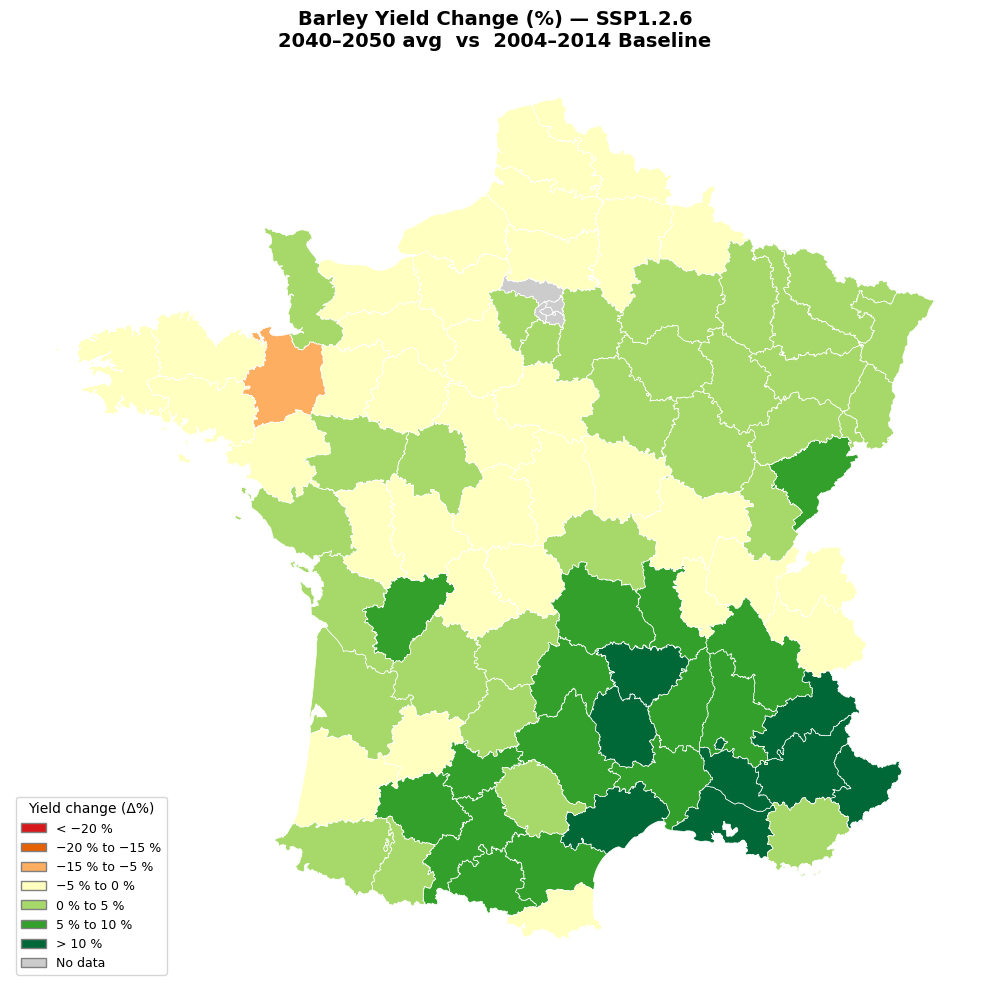

In [305]:
# ── SSP5-8.5 Choropleth ──────────────────────────────────────────────────────
ssp5 = "ssp1_2_6"
#ssp5 = "ssp5_8_5"
year_lo, year_hi = 2040, 2050

proj_ssp5 = proj[
    (proj["scenario"] == ssp5) &
    (proj["year"] >= year_lo) &
    (proj["year"] <= year_hi)
].copy()

delta5 = (
    proj_ssp5
    .groupby(["code_dep", "nom_dep"], as_index=False)["yield_change_pct"]
    .mean()
)

print(f"[SSP5-8.5] Departments with data: {delta5.shape[0]}")
print(delta5["yield_change_pct"].describe())

# Reload GeoJSON (fresh copy, since the previous cell modified gdf)
gdf5 = gpd.read_file("departements.geojson")
gdf5["code2"] = pd.to_numeric(gdf5["code"].str[:2], errors="coerce")
gdf5 = gdf5[gdf5["code2"] < 97].copy()

delta5["code_dep"] = delta5["code_dep"].astype(str).str.zfill(2)
gdf5 = gdf5.merge(delta5, left_on="code", right_on="code_dep", how="left")

# Same color bins
bins   = [-np.inf, -20, -15, -5, 0, 5, 10, np.inf]
labels = [
    "< −20 %",
    "−20 % to −15 %",
    "−15 % to −5 %",
    "−5 % to 0 %",
    "0 % to 5 %",
    "5 % to 10 %",
    "> 10 %",
]
colors = [
    "#d7191c",   # red          < -20%
    "#e66101",   # dark orange  -20% to -15%
    "#fdae61",   # orange       -15% to -5%
    "#ffffbf",   # yellow       -5% to 0%
    "#a6d96a",   # light green   0% to 5%
    "#33a02c",   # medium green  5% to 10%
    "#006837",   # dark green    > 10%
]

gdf5["bin"] = pd.cut(gdf5["yield_change_pct"], bins=bins, labels=labels)

cmap  = ListedColormap(colors)
norm  = BoundaryNorm(bins, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

gdf5[gdf5["yield_change_pct"].isna()].plot(
    ax=ax, color="#cccccc", edgecolor="white", linewidth=0.5
)

gdf5.dropna(subset=["yield_change_pct"]).plot(
    ax=ax,
    column="yield_change_pct",
    cmap=cmap,
    norm=norm,
    edgecolor="white",
    linewidth=0.5,
)

legend_patches = [Patch(facecolor=c, edgecolor="grey", label=l)
                  for c, l in zip(colors, labels)]
legend_patches.append(Patch(facecolor="#cccccc", edgecolor="grey", label="No data"))
ax.legend(handles=legend_patches, loc="lower left", fontsize=9,
          title="Yield change (Δ%)", title_fontsize=10, frameon=True)

ax.set_title(
    f"Barley Yield Change (%) — {ssp5.upper().replace('_','.')}\n"
    f"{year_lo}–{year_hi} avg  vs  2004–2014 Baseline",
    fontsize=14, fontweight="bold"
)
ax.set_axis_off()

plt.tight_layout()
plt.show()